# KNN
Assumptions:
- We are free to implement any distance function

The following code is the implementation of the KNN algorithm.


In [53]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNNClassifier:
    def __init__(self, k=3, distance_func=euclidean_distance):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.distance_function = distance_func

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.distance_function(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

## Using KNN
The following section uses the knn algorithm that was implemented to predict diabetes based on the pima-indians-diabetes dataset.

In [54]:
import pandas as pd

df = pd.read_csv("./pima-indians-diabetes.csv", header=None)
df = df.apply(pd.to_numeric)
df = df.sample(frac=1)
df = df.reset_index()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
n = .70
X_train = X.iloc[:int(len(df) * n)].to_numpy()
y_train = y.iloc[:int(len(df) * n)].to_numpy()
X_train

array([[4.090e+02, 1.000e+00, 1.720e+02, ..., 4.240e+01, 7.020e-01,
        2.800e+01],
       [5.220e+02, 6.000e+00, 1.140e+02, ..., 0.000e+00, 1.890e-01,
        2.600e+01],
       [6.960e+02, 3.000e+00, 1.690e+02, ..., 2.990e+01, 2.680e-01,
        3.100e+01],
       ...,
       [2.380e+02, 9.000e+00, 1.640e+02, ..., 3.080e+01, 8.310e-01,
        3.200e+01],
       [2.090e+02, 7.000e+00, 1.840e+02, ..., 3.550e+01, 3.550e-01,
        4.100e+01],
       [3.080e+02, 0.000e+00, 1.280e+02, ..., 3.050e+01, 1.391e+00,
        2.500e+01]])

In [56]:
X_test = X.iloc[:int(len(df) * (1 - n))].to_numpy()
y_test = y.iloc[:int(len(df) * (1 - n))].to_numpy()

In [57]:
from lib import accuracy, recall, precision, f1

def calculate_metrics(y_test, predictions):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(y_test)):
        y = y_test[i]
        pred = predictions[i]
    
        if y == 1 and pred == 1:
            TP += 1
    
        if y == 0 and pred == 0:
            TN += 1
    
        if y == 1 and pred == 0:
            FN += 1
    
        if y == 0 and pred == 1:
            FP += 1
            
    return accuracy(TP, TN, FP, FN), recall(TP, FN), precision(TP, FP), f1(TP, FP, FN)

In [61]:
for k in range(1, 10):
    clf = KNNClassifier(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    metrics = calculate_metrics(y_test, predictions)
    
    print(f"K: {k}")
    print(f"Accuracy: {metrics[0]}")
    print(f"Recall: {metrics[1]}")
    print(f"Precision: {metrics[2]}")
    print(f"F1: {metrics[3]}")
    print("---")
    

K: 1
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0
---
K: 2
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0
---
K: 3
Accuracy: 0.7869565217391304
Recall: 0.6451612903225806
Precision: 0.7894736842105263
F1: 0.7100591715976331
---
K: 4
Accuracy: 0.8739130434782608
Recall: 0.7634408602150538
Precision: 0.9102564102564102
F1: 0.8304093567251462
---
K: 5
Accuracy: 0.7565217391304347
Recall: 0.5376344086021505
Precision: 0.7936507936507936
F1: 0.6410256410256411
---
K: 6
Accuracy: 0.8347826086956521
Recall: 0.6666666666666666
Precision: 0.8985507246376812
F1: 0.7654320987654321
---
K: 7
Accuracy: 0.7521739130434782
Recall: 0.5591397849462365
Precision: 0.7647058823529411
F1: 0.6459627329192547
---
K: 8
Accuracy: 0.7913043478260869
Recall: 0.5698924731182796
Precision: 0.8688524590163934
F1: 0.6883116883116883
---
K: 9
Accuracy: 0.7347826086956522
Recall: 0.4731182795698925
Precision: 0.7857142857142857
F1: 0.5906040268456376
---


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, metric=euclidean_distance)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [60]:
calculate_metrics(y_test, y_pred)

(0.7478260869565218, 0.3763440860215054, 1.0, 0.546875)

/home/florian/projects/fh/mc/semester3/dnn/lab/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


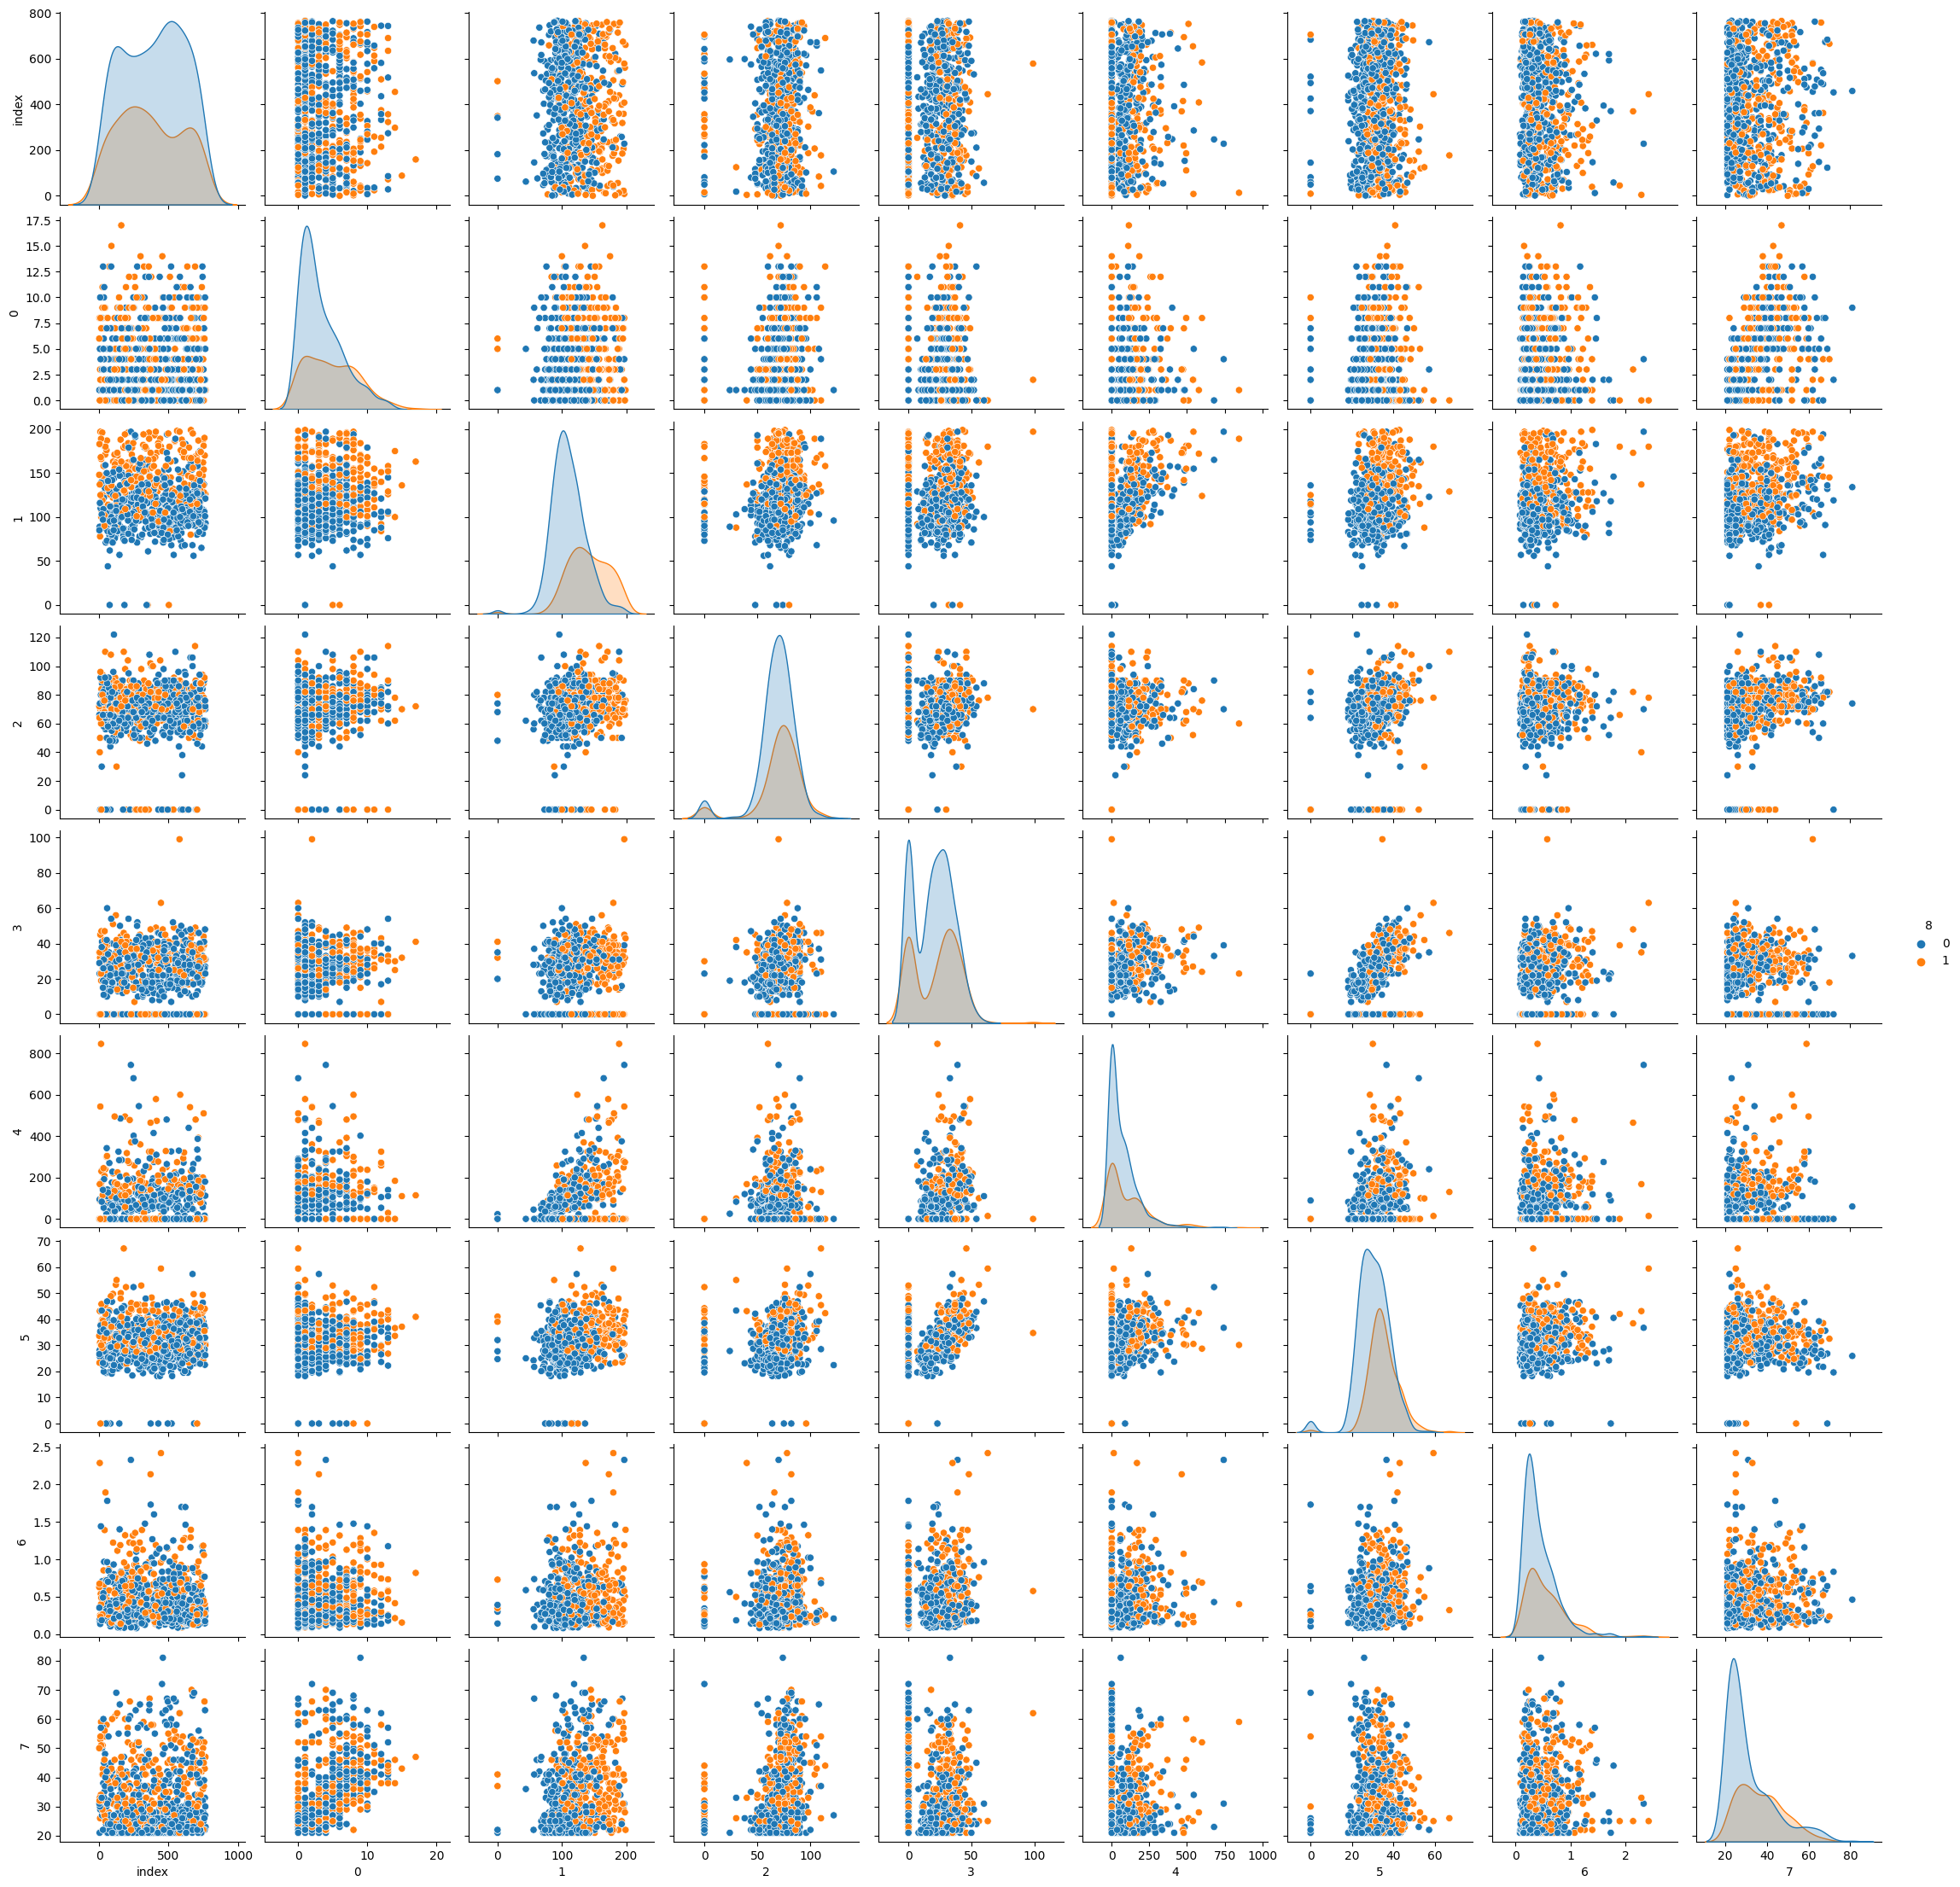

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue=8)
plt.show()